# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [66]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt


In [67]:
open_file = open('yearinfo.json')               #opening json file
yearinfo = json.load(open_file)                 #loading json file
print(yearinfo)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [68]:
#printing first 5 key value pair of 2010
year = yearinfo['2010'][:5]
year

[{'band_singer': ['Kesha'],
  'ranking': 1,
  'song': ['/wiki/Tik_Tok_(song)'],
  'songurl': ['Tik Tok (song)'],
  'titletext': '"Tik Tok"',
  'url': ['/wiki/Kesha']},
 {'band_singer': ['Lady Antebellum'],
  'ranking': 2,
  'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'],
  'songurl': ['Need You Now (Lady Antebellum song)'],
  'titletext': '"Need You Now"',
  'url': ['/wiki/Lady_Antebellum']},
 {'band_singer': ['Train (band)'],
  'ranking': 3,
  'song': ['/wiki/Hey,_Soul_Sister'],
  'songurl': ['Hey, Soul Sister'],
  'titletext': '"Hey, Soul Sister"',
  'url': ['/wiki/Train_(band)']},
 {'band_singer': ['Katy Perry', 'Snoop Dogg'],
  'ranking': 4,
  'song': ['/wiki/California_Gurls'],
  'songurl': ['California Gurls'],
  'titletext': '"California Gurls"',
  'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']},
 {'band_singer': ['Usher (musician)', 'Will.i.am'],
  'ranking': 5,
  'song': ['/wiki/OMG_(Usher_song)'],
  'songurl': ['OMG (Usher song)'],
  'titletext': '"OMG"',
  'url': ['/

In [69]:
#returns name of columns
yearinfo['2010'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [70]:
#returns format of value stored
yearinfo['2010'][0].values()

dict_values([['Kesha'], ['/wiki/Tik_Tok_(song)'], ['Tik Tok (song)'], 1, '"Tik Tok"', ['/wiki/Kesha']])

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [71]:
#write your code here

#creating data_list
data_list = []
for key, values in yearinfo.items():
    for i in values:
      temp_list = list(i.values()) + [key]
      data_list.append(temp_list)

In [72]:
#converting data_list to dataframe
df = pd.DataFrame(data_list)
df.head()

0                                            1  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                       2  3                   4  \
0                       [Tik Tok (song)]  1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]  2      "Need You Now"   
2                     [Hey, Soul Sister]  3  "Hey, Soul Sister"   
3                     [California Gurls]  4  "California Gurls"   
4                     [OMG (Usher song)]  5               "OMG"   

                                           5     6  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [73]:
#renaming all column name 
df.columns = ['band_singer','song','songurl','ranking','titletext','url','year']
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [74]:
#returns the last 5 data rows of the dataframe
df.tail()

band_singer  \
1195                     [Lainey Wilson]   
1196                          [BRS Kash]   
1197                          [Rod Wave]   
1198  [Chase Rice, Florida Georgia Line]   
1199                    [Rauw Alejandro]   

                                               song  \
1195               [/wiki/Things_a_Man_Oughta_Know]   
1196                  [/wiki/Throat_Baby_(Go_Baby)]   
1197                       [/wiki/Tombstone_(song)]   
1198  [/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.]   
1199                             [/wiki/Todo_de_Ti]   

                                  songurl  ranking  \
1195           [Things a Man Oughta Know]       96   
1196              [Throat Baby (Go Baby)]       97   
1197                   [Tombstone (song)]       98   
1198  [Drinkin' Beer. Talkin' God. Amen.]       99   
1199                         [Todo de Ti]      100   

                                titletext  \
1195           "Things a Man Oughta Know"   
1196              "Throat Baby (Go Baby)"   
1197                          "Tombstone"   
1198  "Drinkin' Beer. Talkin' God. Amen."   
1199                         "Todo de Ti"   

                                                 url  year  
1195                           [/wiki/Lainey_Wilson]  2021  
1196                                [/wiki/BRS_Kash]  2021  
1197                                [/wiki/Rod_Wave]  2021  
1198  [/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]  2021  
1199                          [/wiki/Rauw_Alejandro]  2021

In [75]:
#checking for null values
df.isnull().sum()

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [76]:
#returns datatype of the columns
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [77]:
#changing datatype of year to int
df.year = df.year.astype('int')
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [78]:
#Write your program and plot bar graph

#converting list to string
def get_singer(list_name):
  singer = list_name[0]
  return singer

#datapoints to be entered in proper formated value
df['band_singer'] = df.band_singer.map(get_singer)
df['song'] = df.song.map(get_singer)
df['songurl'] = df.songurl.map(get_singer)
df['url'] = df.url.map(get_singer)
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

In [79]:
#determing top 50 highest frequency singer
best_singer = df['band_singer'].value_counts()[:50]
data = pd.DataFrame(best_singer)
data

band_singer
Drake (musician)               26
Maroon 5                       21
Rihanna                        21
Ariana Grande                  20
Taylor Swift                   19
The Weeknd                     16
Chris Brown                    14
Justin Bieber                  14
Katy Perry                     14
Post Malone                    13
Ed Sheeran                     13
Imagine Dragons                12
Lady Gaga                      11
Bruno Mars                     11
Shawn Mendes                   11
Adele                          11
Lil Baby                       10
Jason Derulo                   10
Calvin Harris                  10
Usher (musician)               10
Cardi B                        10
Luke Combs                      9
Kesha                           9
Luke Bryan                      9
Nicki Minaj                     8
Jason Aldean                    8
Pink (singer)                   8
Selena Gomez                    8
Meghan Trainor                  8
DJ Khaled                       8
Pitbull (rapper)                7
Florida Georgia Line            7
Billie Eilish                   7
Lil Wayne                       7
Drake (rapper)                  7
Khalid (singer)                 7
David Guetta                    7
Flo Rida                        7
Migos                           6
One Direction                   6
Pop Smoke                       6
Trey Songz                      6
Doja Cat                        6
Justin Timberlake               6
Megan Thee Stallion             6
OneRepublic                     6
Kendrick Lamar                  6
Juice Wrld                      6
Dua Lipa                        6
Beyoncé                         6

In [80]:
print(type(data))
#selecting singer with frequency greater than 15
top_15 = data.loc[data['band_singer'] >= 15 ]
top_15

<class 'pandas.core.frame.DataFrame'>


band_singer
Drake (musician)           26
Maroon 5                   21
Rihanna                    21
Ariana Grande              20
Taylor Swift               19
The Weeknd                 16

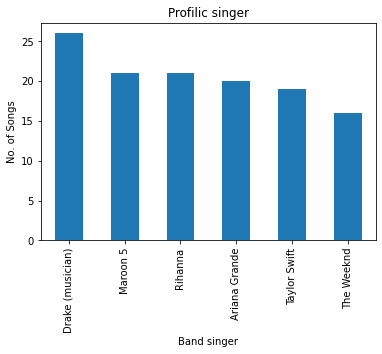

In [95]:
#plotting bar graph
top_15['band_singer'].plot(kind="bar")
plt.xticks(rotation=90)
plt.title('Profilic singer')
plt.xlabel('Band singer')
plt.ylabel('No. of Songs')
plt.show()

**Question: Who is the most profilic singer?**


Drake(musician) is the most profilic singer with 26 songs.

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [82]:
#write your code here

#creating new dataframe as metric_data
metric_data = df
metric_data.head(5)

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

In [83]:
#fetching single ranking value
ranking = metric_data.ranking[0]
type(ranking)
print(type(ranking))

<class 'numpy.int64'>


In [84]:
#creating new column score
def get_ranking(ranking):
  score = 101 - ranking
  return score

metric_data['score'] = metric_data.ranking.map(get_ranking)
metric_data.head(5)

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [85]:
#sorting score column
metric_data.sort_values(['score'],ascending = False, inplace = True)
metric_data.head()

band_singer                       song              songurl  ranking  \
0          Kesha       /wiki/Tik_Tok_(song)       Tik Tok (song)        1   
100        Adele  /wiki/Rolling_in_the_Deep  Rolling in the Deep        1   
1100    Dua Lipa    /wiki/Levitating_(song)    Levitating (song)        1   
1000  The Weeknd      /wiki/Blinding_Lights      Blinding Lights        1   
900    Lil Nas X        /wiki/Old_Town_Road        Old Town Road        1   

                  titletext               url  year  score  
0                 "Tik Tok"       /wiki/Kesha  2010    100  
100   "Rolling in the Deep"       /wiki/Adele  2011    100  
1100           "Levitating"    /wiki/Dua_Lipa  2021    100  
1000      "Blinding Lights"  /wiki/The_Weeknd  2020    100  
900         "Old Town Road"   /wiki/Lil_Nas_X  2019    100

In [86]:
#creating new dataframe
total_data = metric_data[['band_singer','score']]
total_data.head()

band_singer  score
0          Kesha    100
100        Adele    100
1100    Dua Lipa    100
1000  The Weeknd    100
900    Lil Nas X    100

In [87]:
#total score of band_singer
total_score = total_data.groupby('band_singer').sum()
total = total_score.sort_values(by = 'score', ascending = False)

#selecting Top 20 singers
total = total['score'][:20]

Text(0, 0.5, 'Score')

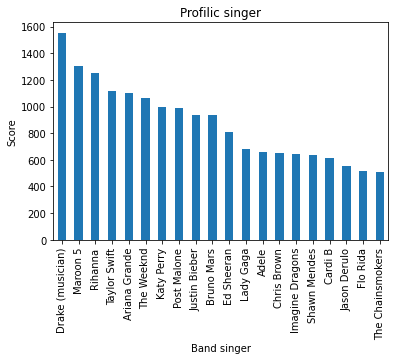

In [88]:
#plotting bar plot
top_20 = pd.DataFrame(t)
top_20['score'].plot(kind = "bar")
plt.title('Profilic singer')
plt.xlabel('Band singer')
plt.ylabel('Score')

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

There is no major differences while using different metrics like score. The most profilic singer remains as Drake (musician).

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

Which singer has the highest number of songs in year 2020? 

In [89]:
len(df.groupby('year'))

12

In [90]:
#creating new dataframe from df dataframe
newdf = df[['band_singer','ranking','year']]
newdf.head()

band_singer  ranking  year
0          Kesha        1  2010
100        Adele        1  2011
1100    Dua Lipa        1  2021
1000  The Weeknd        1  2020
900    Lil Nas X        1  2019

In [91]:
#grouping by year
year = newdf.groupby('year')

#selecting particular group
year = year.get_group(2020)
year

band_singer  ranking  year
1000     The Weeknd        1  2020
1001    Post Malone        2  2020
1002    Roddy Ricch        3  2020
1003       Dua Lipa        4  2020
1004         DaBaby        5  2020
...             ...      ...   ...
1095  Morgan Wallen       96  2020
1096     Luke Combs       97  2020
1097   Moneybagg Yo       98  2020
1098         H.E.R.       99  2020
1099     NLE Choppa      100  2020

[100 rows x 3 columns]

In [92]:
#finding highest frequency in 2020
highest_frequency = year['band_singer'].value_counts(sort=True)
top20_2020 = highest_frequency[:10]
top20_2020

Lil Baby         5
Pop Smoke        4
Luke Combs       3
Juice Wrld       3
The Weeknd       2
Justin Bieber    2
Kane Brown       2
Rod Wave         2
Chris Brown      2
Morgan Wallen    2
Name: band_singer, dtype: int64

In [93]:
#converting series to DataFrame
year2020 = pd.DataFrame(top20_2020)
year2020

band_singer
Lil Baby                 5
Pop Smoke                4
Luke Combs               3
Juice Wrld               3
The Weeknd               2
Justin Bieber            2
Kane Brown               2
Rod Wave                 2
Chris Brown              2
Morgan Wallen            2

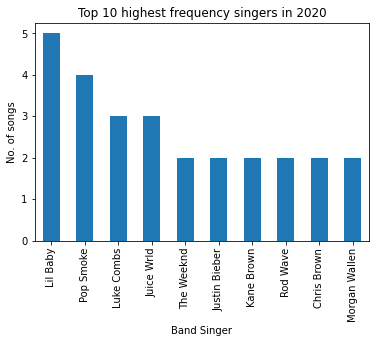

In [96]:
#plotting bar graph 
year2020['band_singer'].plot(kind = "bar")
plt.ylabel('No. of songs')
plt.xlabel('Band Singer')
plt.title('Top 10 highest frequency singers in 2020')
 
# Show Plot
plt.show()

Lil Baby has the highest number of songs in 2020.

## SUBMISSION DATE: 2nd April 2022 